In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
data=pd.read_csv("Social_Network.csv")

In [3]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
data.groupby("Purchased").size()

Purchased
0    257
1    143
dtype: int64

In [5]:
data.shape

(400, 5)

In [6]:
a=pd.get_dummies(data["Gender"])

In [7]:
data=pd.read_csv("Social_Network.csv")

In [8]:
a.head()


,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [9]:
data1=pd.concat([data,a],axis="columns")

In [10]:
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [11]:
data1.rename(columns={"Female":"Male/Female"},inplace=True)

In [12]:
data1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male/Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [13]:
data1.drop(["User ID","Male","Gender"],axis="columns",inplace=True)

In [14]:
data1.head()

,Age,EstimatedSalary,Purchased,Male/Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [15]:
b=data1.groupby("Purchased")

In [16]:
for Yes,No in b:
    print(No)
    print(Yes)

     Age  EstimatedSalary  Purchased  Male/Female
0     19            19000          0            0
1     35            20000          0            0
2     26            43000          0            1
3     27            57000          0            1
4     19            76000          0            0
5     27            58000          0            0
6     27            84000          0            1
8     25            33000          0            0
9     35            65000          0            1
10    26            80000          0            1
11    26            52000          0            1
12    20            86000          0            0
13    32            18000          0            0
14    18            82000          0            0
15    29            80000          0            0
28    29            43000          0            0
29    31            18000          0            0
30    31            74000          0            0
32    21            16000          0            1


In [17]:
data1.head()

,Age,EstimatedSalary,Purchased,Male/Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


Text(0,0.5,'Salary')

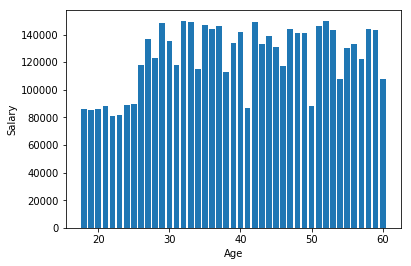

In [18]:
a1=np.array(data1["Age"])
b1=np.array(data1["EstimatedSalary"])
plt.bar(a1,b1)
plt.xlabel("Age")
plt.ylabel("Salary")

In [19]:
data1.head()

,Age,EstimatedSalary,Purchased,Male/Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


In [20]:
y=data1["Purchased"]
X=data1.drop(["Purchased"],axis="columns")

In [21]:
X.head()

,Age,EstimatedSalary,Male/Female
0,19,19000,0
1,35,20000,0
2,26,43000,1
3,27,57000,1
4,19,76000,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.88)

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
X_train.shape

(352, 3)

In [26]:
X_test.shape

(48, 3)

In [27]:
y_test.shape

(48,)

In [28]:
y_train.shape

(352,)

In [41]:
clf=svm.SVC(kernel="linear",C=100)

In [49]:
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred=clf.predict(X_test)

In [51]:
from sklearn import metrics


In [52]:
score=metrics.accuracy_score(y_test,y_pred)


In [53]:
score

0.875

In [54]:
print("The percentage of accuracy is {} %".format(score*100))

The percentage of accuracy is 87.5 %


In [59]:
data1

,Age,EstimatedSalary,Purchased,Male/Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0
5,27,58000,0,0
6,27,84000,0,1
7,32,150000,1,1
8,25,33000,0,0
9,35,65000,0,1


In [60]:
clf.predict(np.array([26,45000,1]).reshape(1,-1))

array([0], dtype=int64)

In [62]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000
